### **Curso 275 - INTRODUÇÃO A CIENCIA DE DADOS**
### SCC - ICMC - USP
### 2o. SEMESTRE DE 2021

**Profa. Dra. Roseli Ap. Francelin Romero**
**Monitor: Kenzo Sakiyama**

## **Questão 01**.

Considere o dataset `Adult Data Set` disponível no arquivo `adult.csv`. A ideia desse dataset é classificar se um determinado indivíduo recebe mais ou menos de 50.000 dólares/ano (atributo `Income`). **Dados faltantes são representados pelo caractere `?`**. Fazendo uma breve exploração dos dados e responda as seguintes questões comprovando por meio de código correspondente: <br>
a) quantos atributos numéricos existem? (0.5) <br> 
b) quantos atributos categóricos existem? (0.5) <br>
c) Se existem dados faltantes, quais são eles e quantos são? (1.0) <br>



In [1]:
import pandas as pd

In [2]:
# código de resolução
adult_dataset = pd.read_csv("adult.csv")
adult_dataset


features_categoricos = adult_dataset.dtypes==object
features_categoricos = adult_dataset.columns[features_categoricos].tolist()

features_numericos = adult_dataset.dtypes!=object
features_numericos = adult_dataset.columns[features_numericos].tolist()

print(f"Existem {len(features_categoricos)} atributos categóricos")
print(f"Existem {len(features_numericos)} atributos numéricos")


print("\n\n\n\nDados faltantes")
adult_dataset[adult_dataset == "?"].count()

Existem 9 atributos categóricos
Existem 6 atributos numéricos




Dados faltantes


age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

### **Questão 02**.

Considere o dataset `Iris` presente no aquivo 'iris.csv'. Determine qual o par de atributos que possui menor correlação de Pearson (em valor absoluto) e qual o valor da correlação. Comprove a resposta por meio de código correspondente. (1.0)

 

O atributo com a menor correlação de person é o que tem o sepal width com o sepal length. Tendo um valor absoluto de -0.109369


,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


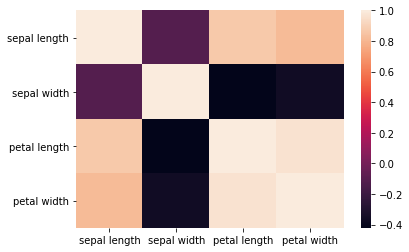

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

iris_dataset = pd.read_csv("iris.csv")
correlations = iris_dataset.corr(method='pearson')

sns.heatmap(correlations)

print("O atributo com a menor correlação de person é o que tem o sepal width com o sepal length. Tendo um valor absoluto de -0.109369")
correlations

## **Questão 03**.
Considere o conjunto de regressão houses_to_rent modificado, disponível no arquivo houses_modified.csv. A ideia desse dataset é estimar o valor de alguel (rent amount (R$)) de um determinado imóvel. Para essa questão você deve:

Carregue o arquivo em um dataframe. Pede-se: <br>
a) gerar um gráfico do tipo boxplot para o atributo rent amount (R$). (0.5) <br>
b) com base no boxplot, o que se pode dizer sobre o tipo de distribuição dos dados em termos da medida de obliquidade. Justifique sua resposta por meio de código correspondente. (1.5)
 

/opt/anaconda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


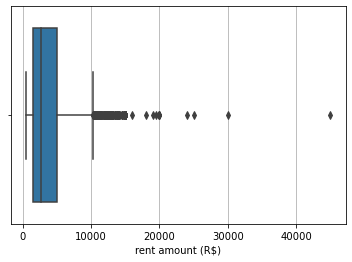

Olhando pro valor de obliquidade pode-ser dizer que os dados estão voltados mais esquerda, apresentando obliquidade positiva igual a: 1.8388773035440982


In [4]:

houses_modified = pd.read_csv("houses_modified.csv")

plt.grid()
sns.boxplot(houses_modified["rent amount (R$)"])
plt.show()

print(f"Olhando pro valor de obliquidade pode-ser dizer que os dados estão voltados mais esquerda, apresentando obliquidade positiva igual a: {houses_modified['rent amount (R$)'].skew()}")

## **Questão 04**.
Suponha que em um problema de classificação binária de um dataset balanceado, um cientista de dados treinou três modelos diferentes e obteve as seguintes acurácias em um determinado conjunto de treino/teste:

Modelo A: Treino = 0.95, Teste = 0.38 <br>
Modelo B: Treino = 0.75, Teste = 0.74 <br>
Modelo C: Treino = 0.35, Teste = 0.75 <br>

Dentre os modelos avaliados, qual seria o melhor? Justifique sua resposta. (2.0)

 

In [5]:
print("O modelo B seria o melhor porque ele apresenta uma boa acurácia na parte de treino e na parte de teste. Valores muito distoantes entre o teste e o treino pode indicar ou uma memorização dos resultados (quando o valor do treino é muito maior do que o do treino, como no modelo A) ou que ele ainda não 'aprendeu' o suficiente (como no modelo C)")

O modelo B seria o melhor porque ele apresenta uma boa acurácia na parte de treino e na parte de teste. Valores muito distoantes entre o teste e o treino pode indicar ou uma memorização dos resultados (quando o valor do treino é muito maior do que o do treino, como no modelo A) ou que ele ainda não 'aprendeu' o suficiente (como no modelo C)


## **Questão 5**

Compare dois classificadores na base dados Breast Cancer e indique o mais adequado para a base de dados (3.0). Siga as instruções: 

- Utilize os códigos disponíveis para carregar e processar os dados.
- Utilize os modelos SVM e KNN com os parâmetros padrão do sklearn.
- Escolha uma técnica de validação cruzada para avaliar os modelos (ex:  *train test split* [(holdout)](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split) , [K-fold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) ou [Stratified K-Fold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold)  para K=10).
- Escolha uma métrica adequada para classificação para comparar os modelos (ex: acurácia, precisão, revocação ou AUC.)

<!-- Execute o código abaixo que projeta dois classificadores: SVM e KNN (usando os parâmetros padrão do sklearn) na base de dados Breast Cancer, e obtenha o score dos modelos obtidos no conjunto de treinamento.

Investige os modelos criados de acordo com a capacidade de se ajustar aos dados de treinamento e estime a generalização utilizando o conjunto de teste. Você também pode usar outras técnicas de avaliação, como validação cruzada (com 5 ou 10 folds por exemplo).

Com base na sua investigação escolha, indique o modelo mais adequado a ser escolhido, justificando sua escolha. -->




## Carregando conjunto de dados

In [6]:
from sklearn.datasets import load_breast_cancer

In [7]:
# Carregando os dados
raw_data = load_breast_cancer()
df = pd.DataFrame(raw_data.data, columns=raw_data.feature_names)
df["class"] = raw_data.target

In [8]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Definindo pre-processamento simples

In [9]:
# Preprocessamento simples
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def preprocess(x, y):
    scaler = MinMaxScaler()
    scaler.fit(x)

    x_novo = scaler.transform(x)
    y_novo = y
    
    return x_novo, y_novo

## Comparação de modelos de aprendizado de máquina

In [10]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
import numpy as np
import matplotlib.pyplot as plt

# Configurando seed para que os experimentos sejam reprodutíveis. NÃO MODIFICAR!
np.random.seed(1234)

X = df.drop(columns="class").values
y = df["class"].values


classificadores = {
  "SVC" : {"modelo": SVC(), "precision_score": [], "accuracy_score": [],  "recall_score": []},
  "KNN k=5" : {"modelo": KNeighborsClassifier(n_neighbors=5, n_jobs=-1 ),  
               "precision_score": [], "accuracy_score": [],  "recall_score": []}
}

kf = KFold(n_splits = 10)
for train_index, test_index in kf.split(X):
    for classificador_name in classificadores:
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        classificadores[classificador_name]["modelo"].fit(X=X_train, y=y_train) # 2) Fit

        # valores preditos pelo classificador
        y_pred = classificadores[classificador_name]["modelo"].predict(X_test)  # 3) Predict
        y_test = np.array(y_test)
        
        
        # Classificadores
        classificadores[classificador_name]["precision_score"].append(metrics.precision_score(y_test, y_pred))
        classificadores[classificador_name]["accuracy_score"].append(metrics.accuracy_score(y_test, y_pred))
        classificadores[classificador_name]["recall_score"].append(metrics.recall_score(y_test, y_pred))
        

In [11]:
print("SVC")

print("Precision score: {:.2f}%".format(100 * np.mean(classificadores["SVC"]["precision_score"])))
print("Accuracy score: {:.2f}%".format(100 * np.mean(classificadores["SVC"]["accuracy_score"])))
print("Recall score: {:.2f}%".format(100 * np.mean(classificadores["SVC"]["recall_score"])))

print("\n\n\n\n")
print("Precision score: {:.2f}%".format(100 * np.mean(classificadores["KNN k=5"]["precision_score"])))
print("Accuracy score: {:.2f}%".format(100 * np.mean(classificadores["KNN k=5"]["accuracy_score"])))
print("Recall score: {:.2f}%".format(100 * np.mean(classificadores["KNN k=5"]["recall_score"])))


SVC
Precision score: 87.68%
Accuracy score: 91.58%
Recall score: 98.29%





Precision score: 90.42%
Accuracy score: 92.63%
Recall score: 96.41%
